# DNS TÜNEL ALGILAMA IÇIN MAKINE ÖĞRENIMI UYGULAMASI

# DNS NEDİR?

-DNS, Domain Name System'in kısaltmasıdır ve internetin temel yapı taşlarından biridir. DNS, insanların anlaması ve hatırlaması kolay olan alan adlarını (örneğin, google.com) bilgisayarların anlayabileceği IP adreslerine (örneğin, 142.250.190.78) çeviren bir sistemdir.

## DNS TÜNELLEME

-DNS tünelleme, DNS protokolünü kullanarak iki cihaz arasında veri alışverişi yapılmasını sağlayan bir tekniktir. Bu yöntem genellikle internet erişim kısıtlamalarını aşmak veya güvenlik kontrollerini atlatmak için kullanılır. DNS tünelleme, meşru amaçlarla kullanılabildiği gibi siber güvenlik tehditlerinde de kötü niyetli amaçlarla kullanılabilir.

### Paketleri yükledim

In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import joblib
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)
from sklearn.model_selection import train_test_split

In [354]:
df=pd.read_csv("Tunnelling_data.txt",delim_whitespace=True,on_bad_lines='skip',header=None)

In [355]:
df=df.drop(3,axis=1) #destination_ip  sütununu kaldırdım.

In [356]:
df = df.rename(columns={
    0: "ZamanDamgasi",        # Timestamp -> ZamanDamgasi
    1: "Protokol",            # Protocol -> Protokol
    2: "Kaynak_IP",           # Source_IP -> Kaynak_IP
    4: "Hedef_IP",            # Destination_IP -> Hedef_IP
    5: "KimlikNo",            # Identification_no -> KimlikNo
    6: "DNS_Turu",            # DNS_type -> DNS_Turu
    7: "DNS_Bilgisi",         # DNS_info -> DNS_Bilgisi
    8: "DNS_CevapUzunlugu"    # DNS_Response_Len -> DNS_CevapUzunlugu
}) #Her bir satırı yeniden isimlendirdim (SEZER CAN KILIÇ VE İROOOOBABA)

In [357]:
df.insert(8,"Lable","Tunnel",True)

### (anomali)Data Frame konusunda bilgiler

In [358]:
print(df.columns)

Index(['ZamanDamgasi', 'Protokol', 'Kaynak_IP', 'Hedef_IP', 'KimlikNo',
       'DNS_Turu', 'DNS_Bilgisi', 'DNS_CevapUzunlugu', 'Lable'],
      dtype='object')


In [359]:
print(df['DNS_Turu'].unique())

['CNAME?' 'CNAME' 'PTR?' 'NXDomain' 'TXT?' 'TXT' 'PTR' 'MX?' 'A?' 'AAAA?'
 nan]


In [360]:
print(df['DNS_Bilgisi'].unique())

['dnscat.60d201f876f3ac26f0d131003afbac0ee3.'
 'dnscat.acb201f876cc2d09230bd1ffff199bc5d2.' '13.3.168.192.in-addr.arpa.'
 ... 'f76901caff46d4a045bb900120859005b2.chalu.com.'
 'f56501caffb73919a61c30ffffd1f93552'
 'f93101caff39da0f3fe40601192ea2a545.chalu.com.']


In [361]:
print(df['Lable'].unique())

['Tunnel']


In [362]:
print(df['DNS_CevapUzunlugu'].unique())

['(59)' '(114)' '(43)' '(44)' '(106)' '(38)' '(62)' '(47)' '(307)' '(310)'
 nan '(152)' '(142)' '(297)' '(238)' '(109)' '(120)' '(271)' '(255)'
 '(313)' '(215)' '(273)' '(78)' '(264)' '(125)' '(144)' '(32)']


In [363]:
df #Şu anki dataFrame bu şekilde

,ZamanDamgasi,Protokol,Kaynak_IP,Hedef_IP,KimlikNo,DNS_Turu,DNS_Bilgisi,DNS_CevapUzunlugu,Lable
0,18:58:15.801177,IP,192.168.3.146.51531,192.168.3.14.domain:,45828+,CNAME?,dnscat.60d201f876f3ac26f0d131003afbac0ee3.,(59),Tunnel
1,18:58:15.802048,IP,192.168.3.14.domain,192.168.3.146.51531:,45828,CNAME,dnscat.acb201f876cc2d09230bd1ffff199bc5d2.,(114),Tunnel
2,18:58:16.197885,IP,192.168.3.14.39576,dns.google.domain:,21832+,PTR?,13.3.168.192.in-addr.arpa.,(43),Tunnel
3,18:58:16.210500,IP,dns.google.domain,192.168.3.14.39576:,21832,NXDomain,0/0/0,(43),Tunnel
4,18:58:16.210722,IP,192.168.3.14.34517,dns.google.domain:,37842+,PTR?,136.3.168.192.in-addr.arpa.,(44),Tunnel
...,...,...,...,...,...,...,...,...,...
12060,19:24:19.917524,IP,192.168.3.146.55198,192.168.3.14.domain:,1576+,TXT?,fb2f01caff1cd77d86273d011fa86acf54.chalu.com.,(62),Tunnel
12061,19:24:19.918503,IP,192.168.3.14.domain,192.168.3.146.55198:,1576,TXT,9aeb01caffc7b2bf4641b8ffffd1f93552,(109),Tunnel
12062,19:24:20.922298,IP,192.168.3.146.55198,192.168.3.14.domain:,24481+,MX?,f76901caff46d4a045bb900120859005b2.chalu.com.,(62),Tunnel
12063,19:24:12.883130,IP,192.168.3.14.domain,192.168.3.146.55198:,41349,TXT,f56501caffb73919a61c30ffffd1f93552,(109),Tunnel


###  (anomali)Veriyi Temizleme ve Hazırlama

In [364]:
df[df.isnull().any(axis=1)] 

,ZamanDamgasi,Protokol,Kaynak_IP,Hedef_IP,KimlikNo,DNS_Turu,DNS_Bilgisi,DNS_CevapUzunlugu,Lable
9613,"'A?',","'AAAA?',","'MX'],",10,(309),NaN,NaN,NaN,Tunnel


Veri satırında 9613 te boşluk var kaldırıyorum.

In [365]:
df=df.drop(9613)

In [366]:
df

,ZamanDamgasi,Protokol,Kaynak_IP,Hedef_IP,KimlikNo,DNS_Turu,DNS_Bilgisi,DNS_CevapUzunlugu,Lable
0,18:58:15.801177,IP,192.168.3.146.51531,192.168.3.14.domain:,45828+,CNAME?,dnscat.60d201f876f3ac26f0d131003afbac0ee3.,(59),Tunnel
1,18:58:15.802048,IP,192.168.3.14.domain,192.168.3.146.51531:,45828,CNAME,dnscat.acb201f876cc2d09230bd1ffff199bc5d2.,(114),Tunnel
2,18:58:16.197885,IP,192.168.3.14.39576,dns.google.domain:,21832+,PTR?,13.3.168.192.in-addr.arpa.,(43),Tunnel
3,18:58:16.210500,IP,dns.google.domain,192.168.3.14.39576:,21832,NXDomain,0/0/0,(43),Tunnel
4,18:58:16.210722,IP,192.168.3.14.34517,dns.google.domain:,37842+,PTR?,136.3.168.192.in-addr.arpa.,(44),Tunnel
...,...,...,...,...,...,...,...,...,...
12060,19:24:19.917524,IP,192.168.3.146.55198,192.168.3.14.domain:,1576+,TXT?,fb2f01caff1cd77d86273d011fa86acf54.chalu.com.,(62),Tunnel
12061,19:24:19.918503,IP,192.168.3.14.domain,192.168.3.146.55198:,1576,TXT,9aeb01caffc7b2bf4641b8ffffd1f93552,(109),Tunnel
12062,19:24:20.922298,IP,192.168.3.146.55198,192.168.3.14.domain:,24481+,MX?,f76901caff46d4a045bb900120859005b2.chalu.com.,(62),Tunnel
12063,19:24:12.883130,IP,192.168.3.14.domain,192.168.3.146.55198:,41349,TXT,f56501caffb73919a61c30ffffd1f93552,(109),Tunnel


In [367]:
df[df.isnull().any(axis=1)] #Veride boşluk yok.

,ZamanDamgasi,Protokol,Kaynak_IP,Hedef_IP,KimlikNo,DNS_Turu,DNS_Bilgisi,DNS_CevapUzunlugu,Lable


In [368]:
df['DNS_CevapUzunlugu'] = df['DNS_CevapUzunlugu'].str.extract(r'\((\d+)\)').astype(int) #sayısal dönüştürme

In [369]:
values_to_drop = ['NXDomain']
df = df[~df['DNS_Turu'].isin(values_to_drop)]

In [370]:
for i  in df.columns:
    print(i,df[i].unique())
    print("")

ZamanDamgasi ['18:58:15.801177' '18:58:15.802048' '18:58:16.197885' ...
 '19:24:20.922298' '19:24:12.883130' '19:24:13.887213']

Protokol ['IP']

Kaynak_IP ['192.168.3.146.51531' '192.168.3.14.domain' '192.168.3.14.39576'
 '192.168.3.14.34517' '192.168.3.14.33344' 'dns.google.domain'
 '192.168.3.14.36996' '192.168.3.14.58351' '192.168.3.14.38728'
 '192.168.3.14.37652' '192.168.3.14.50051' '192.168.3.14.56505'
 '192.168.3.14.42041' '192.168.3.14.52168' '192.168.3.14.34493'
 '192.168.3.14.48307' '192.168.3.14.52976' '192.168.3.14.38087'
 '192.168.3.14.46666' '192.168.3.146.55198' '192.168.3.14.44616'
 '192.168.3.14.35040' '192.168.3.14.41807' '192.168.3.14.45445'
 '192.168.3.14.57502' '192.168.3.14.48921' '192.168.3.14.50257'
 '192.168.3.14.49528']

Hedef_IP ['192.168.3.14.domain:' '192.168.3.146.51531:' 'dns.google.domain:'
 '192.168.3.14.33344:' '192.168.3.146.55198:' '192.168.3.14.41807:']

KimlikNo ['45828+' '45828' '21832+' ... '24481+' '41349' '27462+']

DNS_Turu ['CNAME?' 'CNAME' 

In [371]:
df.shape

(12060, 9)

## (Normal) Veri kümesi işlemleri 

In [372]:
df1=pd.read_csv("Legitimate_data.txt",delim_whitespace=True,on_bad_lines='skip',header=None)

In [373]:
df1=df1.drop(3,axis=1)

In [374]:
df1 = df1.rename(columns={
    0: "ZamanDamgasi",        # Timestamp -> ZamanDamgasi
    1: "Protokol",            # Protocol -> Protokol
    2: "Kaynak_IP",           # Source_IP -> Kaynak_IP
    4: "Hedef_IP",            # Destination_IP -> Hedef_IP
    5: "KimlikNo",            # Identification_no -> KimlikNo
    6: "DNS_Turu",            # DNS_type -> DNS_Turu
    7: "DNS_Bilgisi",         # DNS_info -> DNS_Bilgisi
    8: "DNS_CevapUzunlugu"    # DNS_Response_Len -> DNS_CevapUzunlugu
}) #Her bir satırı yeniden isimlendirdim (SEZER CAN KILIÇ VE İROOOOBABA)

In [375]:
df1.insert(8,"Lable","Normal",True)

In [376]:
df1.shape

(48474, 9)

###  (Normal) Veriyi Temizleme ve Hazırlama

In [377]:
df1[df1.isnull().any(axis=1)]

,ZamanDamgasi,Protokol,Kaynak_IP,Hedef_IP,KimlikNo,DNS_Turu,DNS_Bilgisi,DNS_CevapUzunlugu,Lable
14,15:13:39.217406,IP,dns.google.domain,192.168.86.207.48148:,29452,0/1/0,(94),NaN,Normal
22,15:13:39.899945,IP,dns.google.domain,192.168.86.207.49334:,14055,0/1/0,(86),NaN,Normal
37,15:13:41.355336,IP,dns.google.domain,192.168.86.207.40021:,58912,0/1/0,(97),NaN,Normal
41,15:13:41.471425,IP,dns.google.domain,192.168.86.207.51119:,44134,0/1/0,(87),NaN,Normal
49,15:13:41.901447,IP,dns.google.domain,192.168.86.207.53811:,65368,0/1/0,(82),NaN,Normal
...,...,...,...,...,...,...,...,...,...
48451,17:31:03.676338,IP,192.168.3.132.50917,239.255.255.250.1900:,"UDP,",length,173,NaN,Normal
48452,17:31:03.690746,IP,dns.google.domain,192.168.3.13.59364:,42217,0/1/0,(114),NaN,Normal
48457,17:31:03.824816,IP,dns.google.domain,192.168.3.13.41600:,26612,0/1/0,(94),NaN,Normal
48464,17:31:04.527267,IP,dns.google.domain,192.168.3.13.35508:,30501,0/1/0,(119),NaN,Normal


In [378]:
df1.dropna(inplace=True)

In [379]:
df1.shape

(33600, 9)

In [380]:
df1

,ZamanDamgasi,Protokol,Kaynak_IP,Hedef_IP,KimlikNo,DNS_Turu,DNS_Bilgisi,DNS_CevapUzunlugu,Lable
0,15:13:36.199943,IP,192.168.86.207.47531,dns.google.domainexample.com:,2966+,A?,connectivity-check.ubuntu.com.,(47),Normal
1,15:13:36.199974,IP,192.168.86.207.47531,dns.google.domain:,24491+,AAAA?,connectivity-check.ubuntu.com.,(47),Normal
2,15:13:36.642533,IP,192.168.86.207.50269,dns.google.domain:,49758+,PTR?,8.8.8.8.in-addr.arpa.,(38),Normal
3,15:13:36.708398,IP,192.168.86.207.47035,dns.google.domain:,16199+,PTR?,206.86.168.192.in-addr.arpa.,(45),Normal
4,15:13:36.758224,IP,dns.google.domain,192.168.86.207.47035:,16199,NXDomain,0/0/0,(45),Normal
...,...,...,...,...,...,...,...,...,...
48468,17:31:04.604324,IP,192.168.3.13.44233,dns.google.domain:,22602+,AAAA?,media-router-aol1.prod.g03.yahoodns.net.,(57),Normal
48469,17:31:04.634156,IP,192.168.3.13.56824,dns.google.domain:,58203+,A?,a1822.dscd.akamai.net.,(39),Normal
48471,17:31:04.694286,IP,192.168.3.13.40391,dns.google.domain:,46977+,AAAA?,a1822.dscd.akamai.net.,(39),Normal
48472,17:31:04.759541,IP,192.168.3.13.57563,dns.google.domain:,36745+,A?,intg.snapchat.com.,(35),Normal


In [381]:
df1.DNS_CevapUzunlugu.isnull().sum()

0

In [382]:
df1.duplicated().sum()

0

In [383]:
df1.Protokol.unique()

array(['IP', 'ARP,'], dtype=object)

In [384]:
for i in df1.columns:
    print(i,df1[i].unique()) 
    print("")

ZamanDamgasi ['15:13:36.199943' '15:13:36.199974' '15:13:36.642533' ...
 '17:31:04.694286' '17:31:04.759541' '17:31:04.800526']

Protokol ['IP' 'ARP,']

Kaynak_IP ['192.168.86.207.47531' '192.168.86.207.50269' '192.168.86.207.47035' ...
 '192.168.3.13.35508' '192.168.3.13.37190' '192.168.3.13.40391']

Hedef_IP ['dns.google.domainexample.com:' 'dns.google.domain:'
 '192.168.86.207.47035:' '192.168.86.207.48657:' '192.168.86.89'
 '192.168.86.207' '192.168.86.207.52624:' '192.168.86.207.53632:'
 '192.168.86.207.32883:' '192.168.86.207.40465:' '192.168.86.207.42238:'
 '192.168.86.207.38471:' '192.168.86.207.42268:' '192.168.86.207.bootpc:'
 '192.168.86.207.43281:' '192.168.86.207.36582:' '192.168.86.207.47320:'
 '192.168.86.207.39378:' '192.168.86.207.34127:' '192.168.86.207.44441:'
 'alphyn.canonical.com.ntp:' '192.168.86.207.58481:'
 '192.168.86.207.35830:' '169.254.169.254' '192.168.3.13.48356:'
 '192.168.3.13.59724:' '192.168.3.13.41452:' '192.168.3.13.51369:'
 '192.168.3.13.39587:' '1

## Veri türünü Sayısallaştırma.
-DNS_CevapUzunlugu kısmı nesne durumunda onu int e çevirmemiz gerekiyor.

In [385]:
df1[df1.DNS_CevapUzunlugu=="48"].replace(to_replace="48",value="(48)")

,ZamanDamgasi,Protokol,Kaynak_IP,Hedef_IP,KimlikNo,DNS_Turu,DNS_Bilgisi,DNS_CevapUzunlugu,Lable
2705,15:24:19.329092,IP,192.168.86.207.58481,alphyn.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
2707,15:24:19.719665,IP,alphyn.canonical.com.ntp,192.168.86.207.58481:,"NTPv4,","Server,",length,(48),Normal
3040,16:49:21.407293,IP,192.168.3.13.49064,prod-ntp-4.ntp1.ps5.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
3279,16:49:31.609968,IP,192.168.3.13.47405,pugot.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
3485,16:49:41.859900,IP,192.168.3.13.49969,alphyn.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
3761,16:49:52.109885,IP,192.168.3.13.48715,prod-ntp-3.ntp1.ps5.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
4049,16:50:02.360078,IP,192.168.3.13.43160,prod-ntp-5.ntp1.ps5.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
9054,16:54:28.894992,IP,192.168.3.13.51704,prod-ntp-5.ntp1.ps5.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
9134,16:54:39.109942,IP,192.168.3.13.42613,alphyn.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
9312,16:54:49.359850,IP,192.168.3.13.42841,pugot.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal


In [386]:
df1['DNS_CevapUzunlugu'] = df1['DNS_CevapUzunlugu'].str.extract(r'(\d+)').astype(int)


In [387]:
df1['DNS_CevapUzunlugu'] = df1['DNS_CevapUzunlugu'].replace(to_replace=r'\((\d+)\)', value=r'\1', regex=True).astype(int)


In [388]:
df1.DNS_CevapUzunlugu.unique()

array([ 47,  38,  45,  44,  30,  29,  28,  90,  25,  31, 178,  37,  33,
        26,  35,  34,  36,  43,  24,  27, 154,  22,  39,  32,  54,  41,
        23,  53,  58,  48,  40,  55,  46,  42,  52,  50,  56,  49,  57,
        51,  61, 102,  59,  65,  78, 318, 181, 103,  99,  60,  98,  87,
        88,  79,  73,  72,  77,  63,  71, 120,  81,  67,  66,  80,  64,
        69,  89,  91,  86, 117,  94,  70,  76, 133,  62, 139,  75, 134,
        85, 114, 115, 131, 136,  84,  82, 111, 112, 122,  68,  74, 125,
       110, 124, 100, 101,  83, 104,   4, 130,  92,  95, 107,  97, 118,
       126, 121, 132, 113, 109, 116, 123, 140, 106, 149, 145, 128,  93,
       105, 137, 142, 148, 129, 144,  96, 119, 108, 135, 127, 138, 152,
       143, 146])

In [389]:
df1

,ZamanDamgasi,Protokol,Kaynak_IP,Hedef_IP,KimlikNo,DNS_Turu,DNS_Bilgisi,DNS_CevapUzunlugu,Lable
0,15:13:36.199943,IP,192.168.86.207.47531,dns.google.domainexample.com:,2966+,A?,connectivity-check.ubuntu.com.,47,Normal
1,15:13:36.199974,IP,192.168.86.207.47531,dns.google.domain:,24491+,AAAA?,connectivity-check.ubuntu.com.,47,Normal
2,15:13:36.642533,IP,192.168.86.207.50269,dns.google.domain:,49758+,PTR?,8.8.8.8.in-addr.arpa.,38,Normal
3,15:13:36.708398,IP,192.168.86.207.47035,dns.google.domain:,16199+,PTR?,206.86.168.192.in-addr.arpa.,45,Normal
4,15:13:36.758224,IP,dns.google.domain,192.168.86.207.47035:,16199,NXDomain,0/0/0,45,Normal
...,...,...,...,...,...,...,...,...,...
48468,17:31:04.604324,IP,192.168.3.13.44233,dns.google.domain:,22602+,AAAA?,media-router-aol1.prod.g03.yahoodns.net.,57,Normal
48469,17:31:04.634156,IP,192.168.3.13.56824,dns.google.domain:,58203+,A?,a1822.dscd.akamai.net.,39,Normal
48471,17:31:04.694286,IP,192.168.3.13.40391,dns.google.domain:,46977+,AAAA?,a1822.dscd.akamai.net.,39,Normal
48472,17:31:04.759541,IP,192.168.3.13.57563,dns.google.domain:,36745+,A?,intg.snapchat.com.,35,Normal


## Anlamsız verileri silme + Örnekleme

In [390]:
values_to_drop = ['NXDomain', '192.168.86.206,', '192.168.86.89,', 'ServFail','Reply,',
       'Client,', 'Server,', '192.168.3.116,', '192.168.3.138,',
       '192.168.3.13,', '192.168.3.109,', '192.168.3.104,',
       '192.168.3.115,', '192.168.3.103,', '192.168.3.102,',
       '192.168.3.147,', '192.168.3.120,']
df1 = df1[~df1['DNS_Turu'].isin(values_to_drop)]

In [391]:
df1.DNS_Turu.unique()

array(['A?', 'AAAA?', 'PTR?', '192.168.86.207,'], dtype=object)

In [392]:
df1

,ZamanDamgasi,Protokol,Kaynak_IP,Hedef_IP,KimlikNo,DNS_Turu,DNS_Bilgisi,DNS_CevapUzunlugu,Lable
0,15:13:36.199943,IP,192.168.86.207.47531,dns.google.domainexample.com:,2966+,A?,connectivity-check.ubuntu.com.,47,Normal
1,15:13:36.199974,IP,192.168.86.207.47531,dns.google.domain:,24491+,AAAA?,connectivity-check.ubuntu.com.,47,Normal
2,15:13:36.642533,IP,192.168.86.207.50269,dns.google.domain:,49758+,PTR?,8.8.8.8.in-addr.arpa.,38,Normal
3,15:13:36.708398,IP,192.168.86.207.47035,dns.google.domain:,16199+,PTR?,206.86.168.192.in-addr.arpa.,45,Normal
5,15:13:36.758756,IP,192.168.86.207.44122,dns.google.domain:,62369+,PTR?,32.121.122.34.in-addr.arpa.,44,Normal
...,...,...,...,...,...,...,...,...,...
48468,17:31:04.604324,IP,192.168.3.13.44233,dns.google.domain:,22602+,AAAA?,media-router-aol1.prod.g03.yahoodns.net.,57,Normal
48469,17:31:04.634156,IP,192.168.3.13.56824,dns.google.domain:,58203+,A?,a1822.dscd.akamai.net.,39,Normal
48471,17:31:04.694286,IP,192.168.3.13.40391,dns.google.domain:,46977+,AAAA?,a1822.dscd.akamai.net.,39,Normal
48472,17:31:04.759541,IP,192.168.3.13.57563,dns.google.domain:,36745+,A?,intg.snapchat.com.,35,Normal


In [393]:
for i in df1.columns:
    print(i,df1[i].unique())
    print("")

ZamanDamgasi ['15:13:36.199943' '15:13:36.199974' '15:13:36.642533' ...
 '17:31:04.694286' '17:31:04.759541' '17:31:04.800526']

Protokol ['IP' 'ARP,']

Kaynak_IP ['192.168.86.207.47531' '192.168.86.207.50269' '192.168.86.207.47035' ...
 '192.168.3.13.35508' '192.168.3.13.37190' '192.168.3.13.40391']

Hedef_IP ['dns.google.domainexample.com:' 'dns.google.domain:' '192.168.86.89']

KimlikNo ['2966+' '24491+' '49758+' ... '58203+' '46977+' '15147+']

DNS_Turu ['A?' 'AAAA?' 'PTR?' '192.168.86.207,']

DNS_Bilgisi ['connectivity-check.ubuntu.com.' '8.8.8.8.in-addr.arpa.'
 '206.86.168.192.in-addr.arpa.' ...
 'media-router-aol1.prod.g03.yahoodns.net.' 'intg.snapchat.com.'
 'd889emgu1evay.cloudfront.net.']

DNS_CevapUzunlugu [ 47  38  45  44  30  29  28  90  25  31  37  33  26  35  34  36  43  24
  27  22  39  32  54  41  23  53  58  48  40  55  46  42  52  50  56  49
  57  51  61  59  65  60  87  88  78  79  73  72  77  63  71  81  67  66
  80  64  69  86  94  70  76  62  75  85  89  84  82  

In [394]:
df1.shape

(32719, 9)

In [395]:
df1=df1.sample(frac=1,random_state=42)

## Anomali olan ve normal olan kod satırlarını birleştirme

In [396]:
df2=pd.concat([df,df1[:12064]])

In [397]:
df2.shape

(24124, 9)

In [398]:
df2

,ZamanDamgasi,Protokol,Kaynak_IP,Hedef_IP,KimlikNo,DNS_Turu,DNS_Bilgisi,DNS_CevapUzunlugu,Lable
0,18:58:15.801177,IP,192.168.3.146.51531,192.168.3.14.domain:,45828+,CNAME?,dnscat.60d201f876f3ac26f0d131003afbac0ee3.,59,Tunnel
1,18:58:15.802048,IP,192.168.3.14.domain,192.168.3.146.51531:,45828,CNAME,dnscat.acb201f876cc2d09230bd1ffff199bc5d2.,114,Tunnel
2,18:58:16.197885,IP,192.168.3.14.39576,dns.google.domain:,21832+,PTR?,13.3.168.192.in-addr.arpa.,43,Tunnel
4,18:58:16.210722,IP,192.168.3.14.34517,dns.google.domain:,37842+,PTR?,136.3.168.192.in-addr.arpa.,44,Tunnel
6,18:58:16.805995,IP,192.168.3.146.51531,192.168.3.14.domain:,59536+,TXT?,dnscat.511c01f87681d44363bc4f003be0953e96.,59,Tunnel
...,...,...,...,...,...,...,...,...,...
42244,17:25:05.349745,IP,192.168.3.13.47241,dns.google.domain:,13279+,A?,cs.ffbtas.com.,31,Normal
42076,17:24:56.300470,IP,192.168.3.13.46263,dns.google.domain:,11112+,AAAA?,cs1150.wpc.betacdn.net.,40,Normal
10518,16:56:16.722029,IP,192.168.3.13.45641,dns.google.domain:,43605+,AAAA?,crt.comodoca.com.cdn.cloudflare.net.,53,Normal
13779,16:59:01.446741,IP,192.168.3.13.36324,dns.google.domain:,51840+,A?,wac-msedge.net.,32,Normal


In [399]:
df2.Lable.nunique()

2

In [400]:
replacement = {'A?': 'A', 'PTR?': 'PTR',"MX?":"MX",'AAAA?':'AAAA','CNAME?':'CNAME','TXT?':'TXT'}
df2['DNS_Turu'] = df2['DNS_Turu'].replace(replacement)

In [401]:
df2.DNS_Turu.unique()

array(['CNAME', 'PTR', 'TXT', 'MX', 'A', 'AAAA', '192.168.86.207,'],
      dtype=object)

C:\Users\arda1\AppData\Local\Temp\ipykernel_16520\1527906503.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Lable",data=df2,palette="Set2")


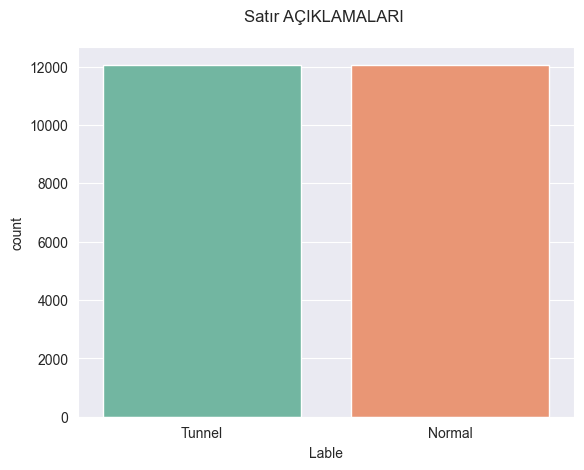

In [402]:
sns.countplot(x="Lable",data=df2,palette="Set2")
plt.title("Satır AÇIKLAMALARI \n ")
plt.savefig("image.png")
plt.show()

In [403]:
plt.figure(figsize=(6,6), dpi=150)

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

In [404]:
x = df2.DNS_Turu.value_counts()

([<matplotlib.patches.Wedge at 0x2ac663bdb50>,
 [Text(-0.8494116606263025, 0.8476436933004737, 'A'),
  Text(-0.8478649104919268, -0.8491908463687756, 'AAAA'),
  Text(0.7077674492702709, -0.9690537847578197, 'CNAME'),
  Text(1.1434402838500617, 0.36406636382518326, 'TXT'),
  Text(0.3878108185591163, 1.1356067845026767, 'MX'),
  Text(0.008282436879386262, 1.1999714168426425, 'PTR'),
  Text(0.000781435575845068, 1.19999974556599, '192.168.86.207,')],
 [Text(-0.49549013536534303, 0.49445882109194295, '25.03%'),
  Text(-0.4945878644536239, -0.49536132704845237, '24.96%'),
  Text(0.41286434540765804, -0.5652813744420614, '20.10%'),
  Text(0.6670068322458692, 0.2123720455646902, '19.64%'),
  Text(0.22622297749281783, 0.6624372909598946, '10.08%'),
  Text(0.00483142151297532, 0.6999833264915415, '0.18%'),
  Text(0.0004558374192429563, 0.6999998515801608, '0.02%')])

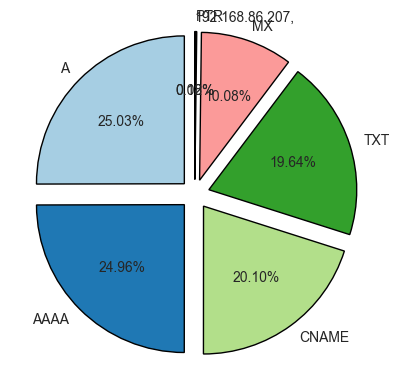

In [405]:
# Pie grafiğini oluşturma
plt.pie(x, 
        labels=x.index,                 # Etiketler
        autopct="%.2f%%",                # Yüzde gösterimi
        startangle=90,                   # Başlangıç açısı
        colors=plt.cm.Paired.colors,     # Renk paleti
        explode=[0.1] * len(x),          # Her dilimi patlatma (ilk 3 dilim)
        wedgeprops={'edgecolor': 'black'})  # Dilim kenarlarını siyah yapma

Text(0.5, 1.0, 'Distribution of DNS Types')

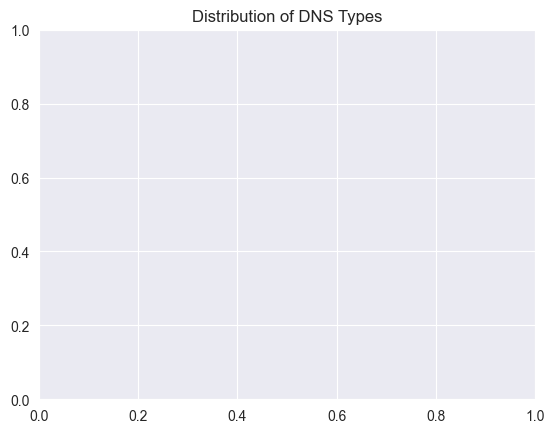

In [406]:
# Başlık
plt.title("Distribution of DNS Types")

In [407]:
# Grafiği kaydetme
plt.savefig("imagePİE.png")

<Figure size 640x480 with 0 Axes>

In [408]:
# Gösterme
plt.show()

## Entropi  hesaplama

In [409]:
import math


def calculate_entropy(text):
    if not text: 
        return 0 
    entropy = 0
    for x in range(256): 
        p_x = float(text.count(chr(x)))/len(text) 
        if p_x > 0: 
            entropy += - p_x*math.log(p_x, 2) 
    return entropy

In [410]:

entropy_train_vals = []

for query in df2['DNS_Bilgisi']:
    entropy = calculate_entropy(query)
    entropy_train_vals.append(entropy)
    
df2['Entropy'] = entropy_train_vals

In [411]:
df2.shape

(24124, 10)

In [412]:
print(df2.columns)


Index(['ZamanDamgasi', 'Protokol', 'Kaynak_IP', 'Hedef_IP', 'KimlikNo',
       'DNS_Turu', 'DNS_Bilgisi', 'DNS_CevapUzunlugu', 'Lable', 'Entropy'],
      dtype='object')


In [413]:
df2 = df2.drop(["ZamanDamgasi", "Protokol", "Kaynak_IP", "Hedef_IP", "KimlikNo"], axis=1)


In [414]:
df2.duplicated().sum()

1006

In [415]:
df2.drop_duplicates(inplace=True)

In [416]:
df2.shape

(23118, 5)

In [417]:
profile = ProfileReport(df2, title="Profil Oluşturma Raporu")

In [418]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [419]:
profile.to_file("ProgramRaporu.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [420]:
X = df2.drop(['Lable'], axis=1)  # Etiket dışında kalan sütunları özellik olarak kullan
y = df2['Lable']  # Etiket sütunu

In [421]:
# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [422]:
from cv2.ml import LogisticRegression

In [423]:
categorical_columns = ['column_name'] 

In [424]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Eğitim ve test verisinin birleşimindeki tüm etiketleri encode etmek için:
all_labels = pd.concat([y_train, y_test])

# LabelEncoder'ı tüm etiketlere göre fit et
label_encoder.fit(all_labels)

# Eğitim ve test verilerini dönüştür
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [425]:
categorical_columns = ['DNS_Turu', 'DNS_Bilgisi']  # Kategorik sütunları buraya ekleyin


In [426]:
# NaN değerleri kontrol etme
print(X_train.isnull().sum())
print(X_test.isnull().sum())

# NaN değerleri doldurma (örneğin, boş değerleri en yaygın kategorik değerle doldurma)
X_train = X_train.fillna(X_train.mode().iloc[0])
X_test = X_test.fillna(X_test.mode().iloc[0])


DNS_Turu             0
DNS_Bilgisi          0
DNS_CevapUzunlugu    0
Entropy              0
dtype: int64
DNS_Turu             0
DNS_Bilgisi          0
DNS_CevapUzunlugu    0
Entropy              0
dtype: int64


In [427]:
print(X_train[categorical_columns].dtypes)

DNS_Turu       object
DNS_Bilgisi    object
dtype: object


In [428]:
# Kategorik sütunları string türüne dönüştür
X_train[categorical_columns] = X_train[categorical_columns].astype(str)
X_test[categorical_columns] = X_test[categorical_columns].astype(str)


In [429]:
# Kategorik sütunları string türüne dönüştür
categorical_columns = ['DNS_Turu', 'DNS_Bilgisi']  # Kategorik sütunlarınızı burada belirleyin

X_train[categorical_columns] = X_train[categorical_columns].astype(str)
X_test[categorical_columns] = X_test[categorical_columns].astype(str)


In [430]:
# NaN değerlerini doldur (örneğin en yaygın değerle)
for col in categorical_columns:
    if col in X_train.columns:
        X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
        X_test[col] = X_test[col].fillna(X_test[col].mode()[0])


In [431]:
from sklearn.preprocessing import LabelEncoder

# Eğitim ve test verisini birleştiriyoruz
all_labels = pd.concat([y_train, y_test])

# LabelEncoder'ı fit ediyoruz
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Eğitim ve test verilerini dönüştür
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [432]:
# Eğitim ve test setinde etiketi fit edip dönüştür
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Test verisini sadece dönüştür


In [433]:
# Eğitim verisinin etiketlerini al
train_labels = label_encoder.classes_

# Test verisindeki etiketlerin eğitim etiketleriyle eşleşip eşleşmediğini kontrol et
unknown_labels = [label for label in y_test if label not in train_labels]
if unknown_labels:
    print(f"Test verisinde görülmeyen etiketler: {unknown_labels}")


In [434]:
from sklearn.preprocessing import OrdinalEncoder

# OrdinalEncoder ile etiketleri dönüştür
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Eğitim verisini fit et ve dönüştür
y_train_encoded = ordinal_encoder.fit_transform(y_train.values.reshape(-1, 1))

# Test verisini dönüştür
y_test_encoded = ordinal_encoder.transform(y_test.values.reshape(-1, 1))


In [435]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [436]:
y_train_encoded = label_encoder.fit_transform(y_train).reshape(-1)
y_test_encoded = label_encoder.transform(y_test).reshape(-1)


In [437]:
print(X_train.shape)
print(X_test.shape)


(16182, 4)
(6936, 4)


In [438]:
import pandas as pd

# Eğer X_train ve X_test DataFrame türündeyse
if isinstance(X_train, pd.DataFrame):
    # NaN değerlerini kontrol etme
    print(X_train.isnull().sum())  # X_train'deki NaN değerlerinin sayısı
    print(X_test.isnull().sum())   # X_test'teki NaN değerlerinin sayısı

    # NaN değerlerini doldurmak (örneğin: en yaygın değerle doldur)
    X_train = X_train.fillna(X_train.mode().iloc[0])  # En yaygın değeri kullanarak NaN doldurma
    X_test = X_test.fillna(X_test.mode().iloc[0])    # Aynı işlemi X_test için de yapıyoruz


DNS_Turu             0
DNS_Bilgisi          0
DNS_CevapUzunlugu    0
Entropy              0
dtype: int64
DNS_Turu             0
DNS_Bilgisi          0
DNS_CevapUzunlugu    0
Entropy              0
dtype: int64


In [439]:
from sklearn.model_selection import train_test_split

# X ve y verinizi ayırın
X = df2.drop(['Lable'], axis=1)  # Etiket dışında kalan sütunları özellik olarak kullan
y = df2['Lable']  # Etiket sütunu

# Eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [440]:
import pandas as pd

# X_train ve X_test DataFrame türündeyse
if isinstance(X_train, pd.DataFrame):
    # NaN değerlerini kontrol etme
    print(X_train.isnull().sum())  # X_train'deki NaN değerlerinin sayısı
    print(X_test.isnull().sum())   # X_test'teki NaN değerlerinin sayısı

    # NaN değerlerini doldurmak (örneğin: en yaygın değerle doldur)
    X_train = X_train.fillna(X_train.mode().iloc[0])  # En yaygın değeri kullanarak NaN doldurma
    X_test = X_test.fillna(X_test.mode().iloc[0])    # Aynı işlemi X_test için de yapıyoruz


DNS_Turu             0
DNS_Bilgisi          0
DNS_CevapUzunlugu    0
Entropy              0
dtype: int64
DNS_Turu             0
DNS_Bilgisi          0
DNS_CevapUzunlugu    0
Entropy              0
dtype: int64


## Zaman damgası ayrıştırılamıyor bu sorunu çözeceğim

In [441]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import math

def calculate_entropy(text):
    """Calculate Shannon entropy of text"""
    if not text or not isinstance(text, str): 
        return 0 
    entropy = 0
    for x in range(256): 
        p_x = float(text.count(chr(x)))/len(text) 
        if p_x > 0: 
            entropy += - p_x*math.log(p_x, 2) 
    return entropy

def calculate_dns_tunneling_features(dns_info):
    """Calculate DNS tunneling-specific features"""
    if not isinstance(dns_info, str):
        return {
            'subdomain_length': 0,
            'unique_chars': 0,
            'digit_ratio': 0,
            'entropy': 0
        }
    
    # Calculate subdomain length
    subdomains = dns_info.split('.')
    subdomain_length = max([len(sub) for sub in subdomains]) if subdomains else 0
    
    # Calculate unique characters ratio
    unique_chars = len(set(dns_info)) / len(dns_info) if dns_info else 0
    
    # Calculate digit ratio
    digit_count = sum(c.isdigit() for c in dns_info)
    digit_ratio = digit_count / len(dns_info) if dns_info else 0
    
    # Calculate entropy
    entropy = calculate_entropy(dns_info)
    
    return {
        'subdomain_length': subdomain_length,
        'unique_chars': unique_chars,
        'digit_ratio': digit_ratio,
        'entropy': entropy
    }

def preprocess_data(filename, label):
    """Load and preprocess DNS data"""
    # Read data
    df = pd.read_csv(filename, delim_whitespace=True, on_bad_lines='skip', header=None)
    
    # Drop unnecessary columns and rename
    df = df.drop(3, axis=1)
    df = df.rename(columns={
        0: "ZamanDamgasi",
        1: "Protokol",
        2: "Kaynak_IP",
        4: "Hedef_IP",
        5: "KimlikNo",
        6: "DNS_Turu",
        7: "DNS_Bilgisi",
        8: "DNS_CevapUzunlugu"
    })
    
    # Add label
    df['Label'] = label
    
    # Clean DNS response length
    df['DNS_CevapUzunlugu'] = df['DNS_CevapUzunlugu'].str.extract(r'(\d+)').astype(float)
    
    # Add DNS tunneling features
    tunneling_features = df['DNS_Bilgisi'].apply(calculate_dns_tunneling_features)
    df['subdomain_length'] = tunneling_features.apply(lambda x: x['subdomain_length'])
    df['unique_chars_ratio'] = tunneling_features.apply(lambda x: x['unique_chars'])
    df['digit_ratio'] = tunneling_features.apply(lambda x: x['digit_ratio'])
    df['query_entropy'] = tunneling_features.apply(lambda x: x['entropy'])
    
    return df

def train_dns_tunnel_detector():
    """Train DNS tunneling detection model"""
    # Load and preprocess data
    legitimate_df = preprocess_data("Legitimate_data.txt", "Normal")
    tunneling_df = preprocess_data("Tunnelling_data.txt", "Tunnel")
    
    # Combine datasets
    df = pd.concat([legitimate_df, tunneling_df])
    
    # Select features for model
    feature_columns = [
        'DNS_CevapUzunlugu',
        'subdomain_length',
        'unique_chars_ratio',
        'digit_ratio',
        'query_entropy'
    ]
    
    # Prepare features and target
    X = df[feature_columns]
    y = df['Label']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Print results
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('DNS Tunneling Detection Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('dns_tunnel_confusion_matrix.png')
    plt.close()
    
    # Feature importance
    importance_df = pd.DataFrame({
        'feature': feature_columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df)
    plt.title('Feature Importance for DNS Tunneling Detection')
    plt.tight_layout()
    plt.savefig('dns_tunnel_feature_importance.png')
    plt.close()
    
    # Save model and scaler
    joblib.dump(model, 'dns_tunnel_model.joblib')
    joblib.dump(scaler, 'dns_tunnel_scaler.joblib')
    
    return model, scaler

def predict_dns_tunnel(dns_info, response_length, model=None, scaler=None):
    """Predict whether a DNS query is tunneling"""
    if model is None:
        model = joblib.load('dns_tunnel_model.joblib')
    if scaler is None:
        scaler = joblib.load('dns_tunnel_scaler.joblib')
    
    # Calculate features
    features = calculate_dns_tunneling_features(dns_info)
    
    # Create feature vector
    X = pd.DataFrame([[
        float(response_length),
        features['subdomain_length'],
        features['unique_chars'],
        features['digit_ratio'],
        features['entropy']
    ]], columns=[
        'DNS_CevapUzunlugu',
        'subdomain_length',
        'unique_chars_ratio',
        'digit_ratio',
        'query_entropy'
    ])
    
    # Scale features
    X_scaled = scaler.transform(X)
    
    # Make prediction
    prediction = model.predict(X_scaled)[0]
    probability = model.predict_proba(X_scaled)[0]
    
    return {
        'prediction': prediction,
        'confidence': max(probability)
    }

if __name__ == "__main__":
    # Train model
    model, scaler = train_dns_tunnel_detector()
    
    # Example prediction
    sample_query = {
        'dns_info': 'example.suspicious.very.long.subdomain.com',
        'response_length': 128
    }
    
    result = predict_dns_tunnel(
        sample_query['dns_info'],
        sample_query['response_length'],
        model,
        scaler
    )
    
    print("\nSample Prediction:")
    print(f"DNS Query: {sample_query['dns_info']}")
    print(f"Prediction: {result['prediction']}")
    print(f"Confidence: {result['confidence']:.2%}")


Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      9678
      Tunnel       1.00      0.99      1.00      2430

    accuracy                           1.00     12108
   macro avg       1.00      1.00      1.00     12108
weighted avg       1.00      1.00      1.00     12108


Sample Prediction:
DNS Query: example.suspicious.very.long.subdomain.com
Prediction: Normal
Confidence: 89.00%


In [442]:
import requests
from bs4 import BeautifulSoup

def fetch_dns_data(url):
    """
    URL üzerinden DNS verisini çeker.
    
    Parameters:
    url (str): DNS bilgilerini içeren web sayfasının URL'si.
    
    Returns:
    dict: Çekilen DNS verileri.
    """
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Örneğin, HTML sayfasından DNS türü ve cevabın uzunluğunu çekeceğiz
        dns_turu = soup.find('div', class_='dns_turu').text.strip()  # Örnek: DNS türü
        dns_bilgisi = soup.find('div', class_='dns_bilgisi').text.strip()  # Örnek: DNS bilgisi
        cevap_uzunlugu = len(soup.find('div', class_='cevap_bilgisi').text.strip())  # Örnek: cevap uzunluğu
        
        # Entropy gibi ekstra hesaplamalar yapılabilir
        entropy = calculate_entropy(dns_bilgisi)  # Entropy hesaplaması
        
        return {
            'DNS_Turu': dns_turu,
            'DNS_Bilgisi': dns_bilgisi,
            'DNS_CevapUzunlugu': cevap_uzunlugu,
            'Entropy': entropy
        }
    else:
        raise ValueError("URL'den veri çekilemedi.")


In [443]:
df2

,DNS_Turu,DNS_Bilgisi,DNS_CevapUzunlugu,Lable,Entropy
0,CNAME,dnscat.60d201f876f3ac26f0d131003afbac0ee3.,59,Tunnel,3.855905
1,CNAME,dnscat.acb201f876cc2d09230bd1ffff199bc5d2.,114,Tunnel,3.910440
2,PTR,13.3.168.192.in-addr.arpa.,43,Tunnel,3.507380
4,PTR,136.3.168.192.in-addr.arpa.,44,Tunnel,3.531941
6,TXT,dnscat.511c01f87681d44363bc4f003be0953e96.,59,Tunnel,4.100302
...,...,...,...,...,...
8247,A,samsungapps.com.,33,Normal,3.202820
3059,A,outlook.com.,29,Normal,2.751629
42244,A,cs.ffbtas.com.,31,Normal,3.039149
13779,A,wac-msedge.net.,32,Normal,3.456565
